# Inaugural Project

This inaugural project is made by:
- Jacob Grenaa Vestergaard
- Emil Henry Erbas
- Jeppe Vanderhaegen

We consider the following model:
$$
\begin{align}
\max_{L_M,H_M,L_F,H_F} & \frac{Q^{1-\rho}}{1-\rho} - \nu \left(\frac{T_M^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}} + \frac{T_F^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}  \right), \ \rho > 1, \nu > 0, \epsilon > 0 \\
\text{s.t.}& \nonumber \\
C &= w_M L_M + w_F L_F \\
H &= \begin{cases}
\min\{H_M,H_F\} & \text{if } \sigma = 0 \\
H_M^{1-\alpha}H_F^\alpha & \text{if } \sigma = 1 \\
\left(\left(1-\alpha\right) H_M^{\frac{\sigma-1}{\sigma}} + \alpha H_F^{\frac{\sigma-1}{\sigma}}\right) & \text{else}
\end{cases}\\
Q &= C^\omega H^{1-\omega} \\
T_M &= L_M + H_M \\
T_F &= L_F + H_F \\
L_M,H_M,L_F,H_F &\geq 0 \\
T_M,T_F &\leq 24
\end{align}
$$

# Importing essentials

In [15]:
# Importing autoreload
%load_ext autoreload
%autoreload 2

# Importing essential packages
from types import SimpleNamespace
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

# Importing the model
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

# Defining the model in this Notebook
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explanation of the code**

First, we define a list of the requested values for alpha and sigma. Subsequently, empty lists are created to store the results obtained from solving the model for these various values.

Next, we proceed with constructing a loop that iterates through all the different combinations of alpha and sigma. Within each iteration, the model is solved, and the ratio, HF/HM, is calculated. These results are then added to the list.

Upon completion of the loop, the collected results are visualized using matplotlib. At last, the results are printed in a custom-maded table.



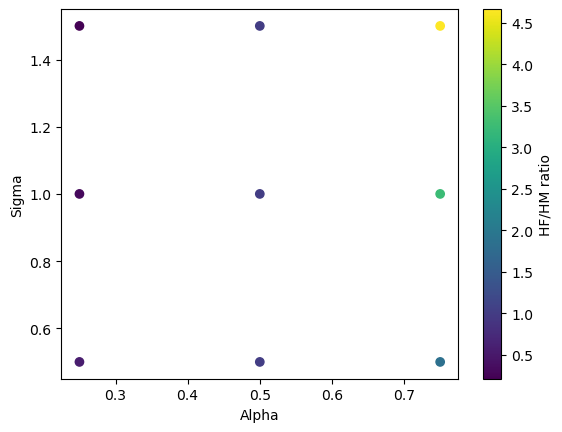

Alpha - Sigma    0.50    1.00    1.50
----------------------------------------
    0.25    |   0.55   0.31   0.21
    0.50    |   1.00   1.00   1.00
    0.75    |   1.83   3.25   4.67


In [16]:
import warnings
warnings.filterwarnings("ignore")

# Defining the different values of alpha and sigma
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1, 1.5]

# Creating empty lists, to store results
ratios = []
alphas = []
sigmas = []

# Creating a loop for the different values of alpha and sigma
for alpha in alpha_vals:
    for sigma in sigma_vals:
        
        # Using the model to calculate optimal HF and HM
        household = HouseholdSpecializationModelClass()
        
        # Set the desired parameter values
        household.par.alpha = alpha
        household.par.sigma = sigma
        
        # Solving for the optimal values
        opt = household.solve_discrete()
        
        # Calculating the ratio, HF/HM
        ratio = opt.HF / opt.HM
        
        # Storing the results in the empty lists
        ratios.append(ratio)
        alphas.append(alpha)
        sigmas.append(sigma)
        
# Creating a scatterplot of the stored results in the list
plt.scatter(alphas, sigmas, c=ratios)
plt.colorbar(label='HF/HM ratio')
plt.xlabel('Alpha')
plt.ylabel('Sigma')
plt.show()

# Also creating a table
def print_table():
    #We define an empty text string to enter a title later
    text = ''

    # Creating the top header of the table. Alpha is values downward and Sigma to the right.
    text += f'{"Alpha - Sigma":3s}'
    for j, sigma in enumerate(sigma_vals):
       household.par.sigma = sigma
       text += f'{sigma:8.2f}' 
    text += '\n' + "-"*40 + "\n" # creating a line shift 
    
    # Creating the body of the table
    for i, alpha in enumerate(alpha_vals):
        household.par.alpha = alpha
        if i > 0:
            text += '\n' # creating a line shift
        text += f'{alpha:8.2f}    |' # creating the left header
        for j, sigma in enumerate(sigma_vals):
            household.par.sigma=sigma
            opt = household.solve_discrete()
            text += f'{opt.HF/opt.HM:7.2f}'
    
    # Print
    print(text)

print_table()

# Question 2

**Explanation of the code**

To begin, we initialize an empty list to hold the results obtained from the loop. We iterate over each element, wF, in the vector of interest and discretely solve the model. For each iteration, we calculate the logarithmic ratio between HF and HM. After completing the loop, we add the calculated results to the empty list.

Finally, we plot the logarithm of HF/HM on the y-axis, which we obtained from the loop, and the logarithm of wF/wM on the x-axis.

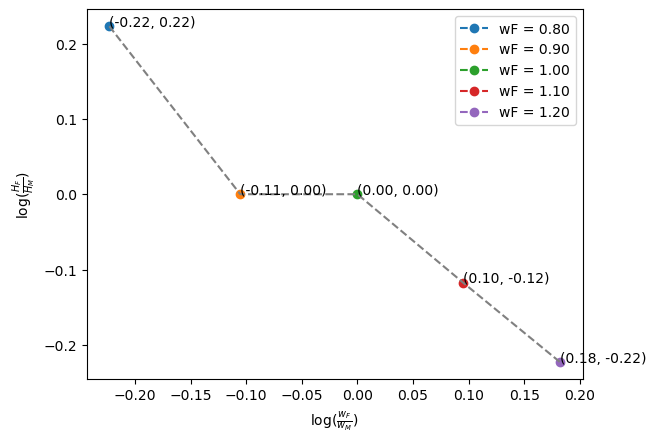

In [17]:
# Empty list to store results
ratiosQ2 = []

# Lists to store x and y coordinates
x_coords = []
y_coords = []

# Looping over wF values
for wF in model.par.wF_vec:
    
    # Setting value 
    model.par.wF = wF

    # Solving for discrete optimal choice
    opti = model.solve_discrete()

    # Creating Ratio 
    HF_HM = np.log(opti.HF/opti.HM)

    # Storing coordinates
    x_coords.append(np.log(wF/model.par.wM))
    y_coords.append(HF_HM)

    # Plotting 
    plt.plot(np.log(wF/model.par.wM), HF_HM, 'o', label=f'wF = {wF/model.par.wM:.2f}', linestyle="--")

    # Storing results
    ratiosQ2.append(HF_HM)

# Plotting the line
plt.plot(x_coords, y_coords, color='grey', linestyle='--')

# Adding text annotations for the five dots
for i in range(5):
    plt.annotate(f'({x_coords[i]:.2f}, {y_coords[i]:.2f})', (x_coords[i], y_coords[i]))

# Customizing plot 
plt.xlabel(r'$\log(\frac{w_F}{w_M})$')
plt.ylabel(r'$\log(\frac{H_F}{H_M})$')
plt.legend()

# Printing and visualizing
plt.show()



# Question 3

**Explanation of the code**

We utilize the solve_wF_vec method to solve the model based on the requested parameters. Next, we compute the logHFHM_ratio_results, which is derived from the optimal model (model.opt.logHFHM). The logFwM_ratio is then assigned a logarithmic numpy array, encompassing the values [0.8, 0.9, 1.0, 1.1, 1.2].Subsequently, we generate a plot with wF/wM on the x-axis and HF/HM on the y-axis.

The creation of the plot is accomplished using the matplotlib.pyplot library. To label the points on the plot, we iterate over them, using the zip function.

The plot reveals an ascending trend in the HF/HM ratio as the wF/wM ratio declines. This observation aligns with expectations since the HF/HM ratio represents the household's utility from consumption and leisure, while the wF/wM ratio represents the household's wage relative to the market's wage.

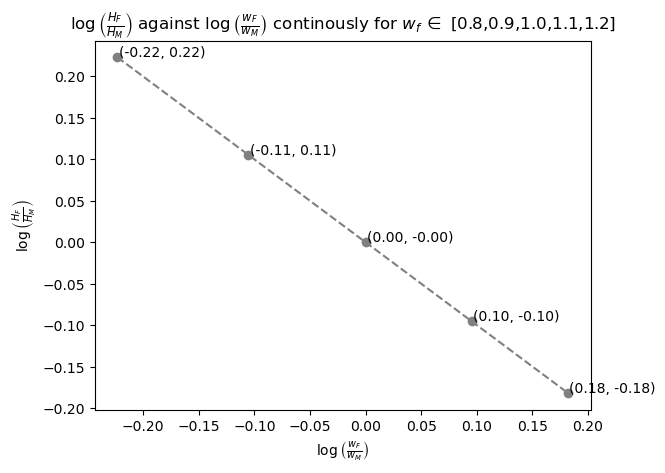

In [18]:
# Solving the model
model.solve_wF_vec()

logHFHM_ratio_results = model.opt.logHFHM
logwFwM_ratio = np.log(model.par.wF_vec)

# Plot results
plt.plot(logwFwM_ratio, logHFHM_ratio_results, 'o--', color='grey')

# Set title and labels
plt.title(r'$\log\left(\frac{H_F}{H_M}\right)$ against $\log\left(\frac{w_F}{w_M}\right)$ continously for $w_f \: \in$ [0.8,0.9,1.0,1.1,1.2]')
plt.xlabel(r'$\log\left(\frac{w_F}{w_M}\right)$')
plt.ylabel(r'$\log\left(\frac{H_F}{H_M}\right)$')

# Add annotations
for x, y in zip(logwFwM_ratio, logHFHM_ratio_results):
    plt.annotate(f"({x:.2f}, {y:.2f})", (x + 0.001, y + 0.0005))


plt.show()

# Question 4

**Explanation of the code**

We begin by employing the estimation method outlined in HouseHoldSpecializationModel.py. Subsequently, we assign the values obtained from the estimate() function to sigma and alpha. With these newly acquired estimates, we utilize the solve_wF_vec method to solve the model once more. Following this, we generate a set of lines based on the information provided by Siminski and Yetsenga (2022) using numpy.linspace and numpy.log. To visualize the outcomes, we plot the results employing matplotlib.pyplot. Finally, we iterate over the points to add annotations.

The results can be observed below.





α_opt = 0.9820
σ_opt = 0.0999
Residual_opt = 0.0000
Using the estimates for alpha and sigma, we find that beta0 is 0.39996 and beta1 is -0.09997, which is approximately the same as Siminski and Yetsenga (2022)


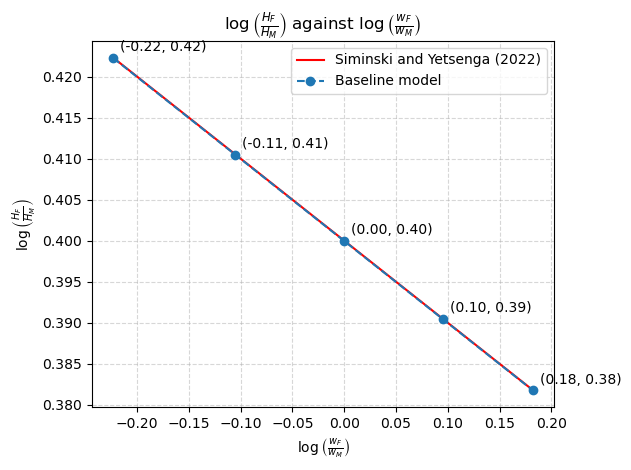

In [19]:
# Calling the estimate() function
model.estimate(do_print=True)

# Assigning the obtained values to our model
model.par.alpha = model.opt.alpha
model.par.sigma = model.opt.sigma

# Printing beta0 and beta1
print(f'Using the estimates for alpha and sigma, we find that beta0 is {model.opt.beta0:.5f} and beta1 is {model.opt.beta1:.5f}, which is approximately the same as Siminski and Yetsenga (2022)')

# Solving model with new estimates
model.solve_wF_vec()

# Storing obtained results
logHFHM_ratio_results = model.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

# Genereating results from Siminski and Yetsenga (2022)
x = np.log(np.linspace(0.8, 1.2, 2))
y = model.par.beta0_target + model.par.beta1_target*x

plt.plot(x, y, color='red', linestyle='-', label='Siminski and Yetsenga (2022)')
plt.plot(logwFwM_ratio, logHFHM_ratio_results, marker='o', linestyle='--', label='Baseline model')

# Legend
plt.legend(loc='upper right')

# Customizing the plot
plt.title(r'$\log\left(\frac{H_F}{H_M}\right)$ against $\log\left(\frac{w_F}{w_M}\right)$')
plt.xlabel(r'$\log\left(\frac{w_F}{w_M}\right)$')
plt.ylabel(r'$\log\left(\frac{H_F}{H_M}\right)$')

# Creating annotations
for i in range(5):
    plt.annotate(f"({logwFwM_ratio[i]:.2f}, {logHFHM_ratio_results[i]:.2f})", (logwFwM_ratio[i], logHFHM_ratio_results[i]), xytext=(5, 5), textcoords='offset points')

# Gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusting the layout
plt.tight_layout()

# Display the plot
plt.show()

# Question 5

**Explanation of the code**

Assuming empirical data reveals that alpha equals 0.5, we delve into the consequences it entails for the estimation and execute the baseline model under this condition. The resulting outcomes can be observed in the first of the two Python cells provided below.

To expand the model, we introduce the consideration of variation in disutility derived from work between men and women. It is important to note, that we normalize epsilon for men to be equal to 1. Subsequently, we re-estimate the model and present the results in the latter of the two Python cells below.

In light of these findings, we can deduce that our model extension exhibits an improvement. This is evidenced by the fact that the error in the extended model is strictly smaller.


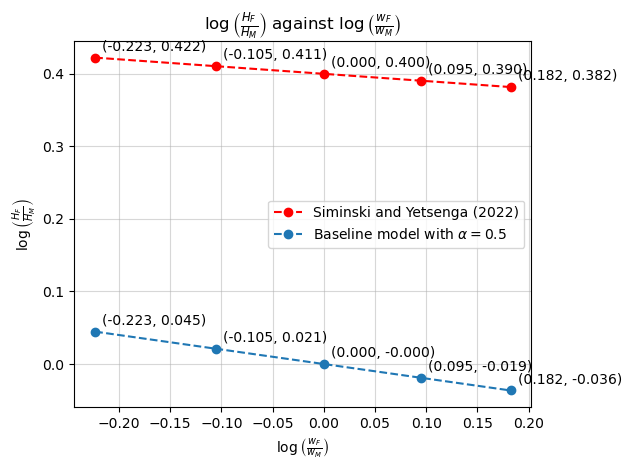

The error is minimized top 0.170, when alpha is 0.500 and sigma is 0.200.
This results in beta0 being equal to -0.000 and beta1 being equal -0.200.


In [20]:
# Ensuring baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0

# Running the model
model.estimate_extended(sigma=1.0,epsilon_F=1.0,extend=False)

# Solving model with new estimates
model.solve_wF_vec()

# Storing obtained results
logHFHM_ratio_results = model.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

# Genereating results from Siminski and Yetsenga (2022)
x = np.log(np.linspace(0.8, 1.2, 5))
y = model.par.beta0_target + model.par.beta1_target*x

plt.plot(x, y, marker= 'o', color='red', linestyle='--', label='Siminski and Yetsenga (2022)')
plt.plot(logwFwM_ratio, logHFHM_ratio_results, marker='o', linestyle='--', label=r'Baseline model with $\alpha=0.5$')

# Legend
plt.legend(loc='best')

# Customizing the plot
plt.title(r'$\log\left(\frac{H_F}{H_M}\right)$ against $\log\left(\frac{w_F}{w_M}\right)$')
plt.xlabel(r'$\log\left(\frac{w_F}{w_M}\right)$')
plt.ylabel(r'$\log\left(\frac{H_F}{H_M}\right)$')

# Creating annotations
for i in range(5):
    plt.annotate(f"({x[i]:.3f}, {y[i]:.3f})", (x[i], y[i]), xytext=(5, 5), textcoords='offset points')

# Creating annotations
for i in range(5):
    plt.annotate(f"({logwFwM_ratio[i]:.3f}, {logHFHM_ratio_results[i]:.3f})", (logwFwM_ratio[i], logHFHM_ratio_results[i]), xytext=(5, 5), textcoords='offset points')

# Gridlines
plt.grid(True, linestyle='-', alpha=0.5)

# Adjusting the layout
plt.tight_layout()

# Display the plot
plt.show()

# Results
error1 = (model.opt.beta0 - model.par.beta0_target)**2 + (model.opt.beta1 - model.par.beta1_target)**2
print(f'The error is minimized to {error1:.3f}, when alpha is {model.par.alpha:.3f} and sigma is {model.par.sigma:.3f}.')
print(f'This results in beta0 being equal to {model.opt.beta0:.3f} and beta1 being equal {model.opt.beta1:.3f}.')

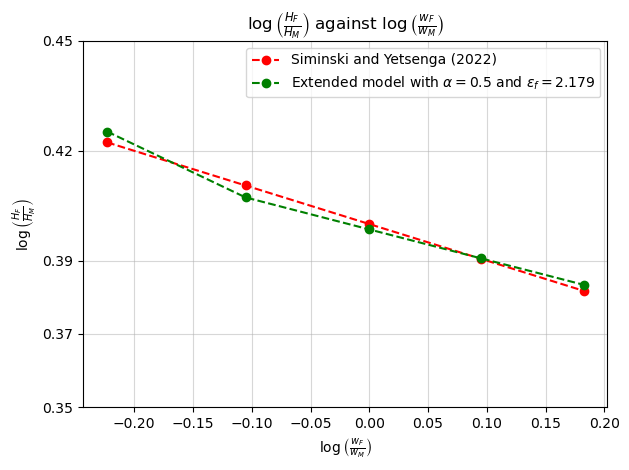

The error is minimized to 0.00000000, when alpha is 0.50000000 and sigma is 1.90578516.
This results in beta0 being equal 0.40000397 and beta1 being equal to -0.10000398.
In the baseline model, epsilon is 1 for both men and women. When we normalize epsilon_M to 1, we find that epsilon_F is 2.17929926.


In [21]:
# Ensuring baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0
model.par.epsilon_F = 1.0
model.par.epsilon_M = 1.0

# Running the extended model
model.estimate_extended(sigma=1.0,epsilon_M=1.0,epsilon_F=1.0,extend=True)

# Solving model with new estimates
model.solve_wF_vec()

# Storing obtained results
logHFHM_ratio_results = model.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

# Genereating results from Siminski and Yetsenga (2022)
x = np.log(np.linspace(0.8, 1.2, 5))
y = model.par.beta0_target + model.par.beta1_target*x

plt.plot(x, y, marker= 'o', color='red', linestyle='--', label='Siminski and Yetsenga (2022)')
plt.plot(logwFwM_ratio, logHFHM_ratio_results, color='green', marker='o', linestyle='--', label=r'Extended model with $\alpha=0.5$ and $\epsilon_f=2.179$')

# Legend
plt.legend(loc='best')

# Customizing the plot
plt.title(r'$\log\left(\frac{H_F}{H_M}\right)$ against $\log\left(\frac{w_F}{w_M}\right)$')
plt.xlabel(r'$\log\left(\frac{w_F}{w_M}\right)$')
plt.ylabel(r'$\log\left(\frac{H_F}{H_M}\right)$')

# Gridlines
plt.grid(True, linestyle='-', alpha=0.5)

# Adjusting the layout
plt.tight_layout()

ytick_positions = [0.35, 0.37, 0.39, 0.42, 0.45]  # Example tick positions
ytick_labels = ['0.35', '0.37', '0.39', '0.42', '0.45']  # Example tick labels
plt.yticks(ytick_positions, ytick_labels)

# Display the plot
plt.show()

# Results
error2 = (model.opt.beta0 - model.par.beta0_target)**2 + (model.opt.beta1 - model.par.beta1_target)**2
print(f'The error is minimized to {error2:.8f}, when alpha is {model.par.alpha:.8f} and sigma is {model.par.sigma:.8f}.')
print(f'This results in beta0 being equal {model.opt.beta0:.8f} and beta1 being equal to {model.opt.beta1:.8f}.') 
print((f'In the baseline model, epsilon is 1 for both men and women. When we normalize epsilon_M to 1, we find that epsilon_F is {model.par.epsilon_F:.8f}.'))